In [2]:
import cv2
%pylab
%matplotlib inline


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# 直方图均衡化

## 基本处理

``
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
``
- images：它是uint8类型或float32的源图像。它应该用方括号括起来，也就是”[img]”。

- channels：它也用方括号括起来。它是我们计算直方图的信道的索引。例如，如果输入是灰度图像，它的值是0。对于颜色图像，您可以通过0、1或2来分别计算蓝色、绿色或红色通道的直方图。

- mask：遮罩图。为了找到完整图像的直方图，它被指定为“None”。但如果你想找到图像的特定区域的直方图，你必须为它创建一个遮罩图，并将其作为遮罩。

- histSize：这代表了我们的BINS数。需要用方括号来表示。在整个范围内，我们通过了256。

- ranges：强度值范围，通常是 [ 0，256 ]

[[2012.]
 [2022.]
 [1856.]
 [1779.]
 [1714.]
 [1638.]
 [1532.]
 [1367.]
 [1244.]
 [1277.]] [2022 1856 1779 1714 1638 1532 1367 1244 1277 1066]


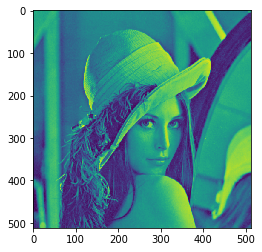

In [3]:
'''
读取一张灰度图计算直方图
'''

img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/lena.png", 0)
plt.imshow(img)
cv_hist = cv2.calcHist([img], [0], None, [256], [0,256]) # OpenCV
np_hist, bins = np.histogram(img.ravel(), 255, [0,256]) #numpy
print(cv_hist[50:60], np_hist[50:60])

In [ ]:
'''使用plt绘制'''
plt.hist(img.ravel(), 256) # plt.hist(img.ravel(), 256, [0,256])
plt.show()

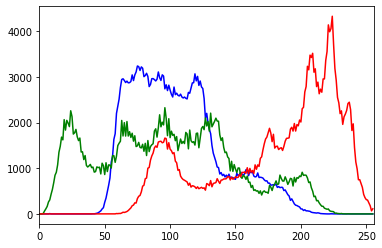

In [5]:
'''绘制BGR图像直方图'''
img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/lena.png")
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.show()

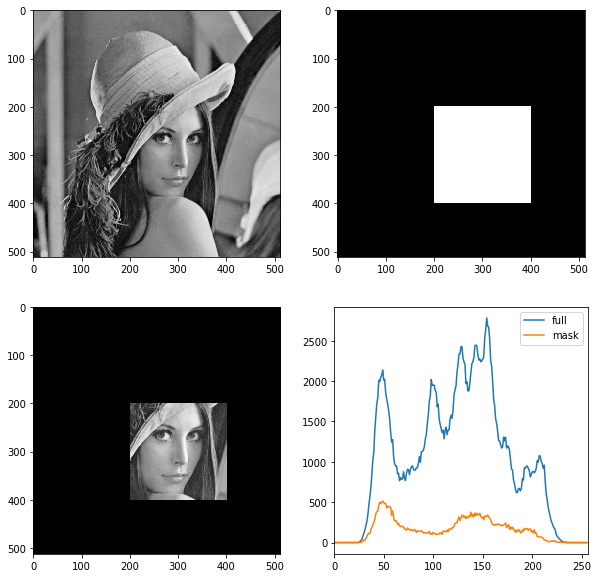

In [6]:
'''应用遮罩'''
img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/lena.png", 0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[200:400, 200:400] = 255
masked_img = cv2.bitwise_and(img, img, mask=mask)

#Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256])

plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, label="full"), plt.plot(hist_mask, label="mask")
plt.legend()
plt.xlim([0,256])

plt.show()

## 均衡化处理

In [7]:
def CdfNormalize(img):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum() # 累加
   
    return cdf*float(hist.max())/cdf.max()

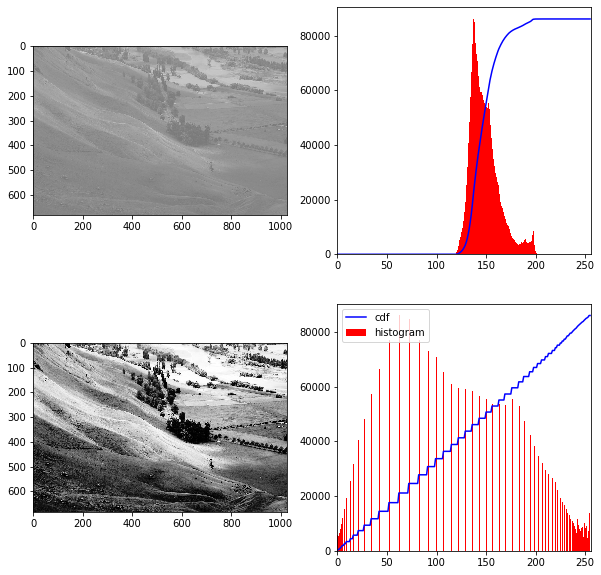

In [8]:
'''numpy实现'''
img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/hill.jpg")
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(img)

plt.subplot(222) 
plt.plot(CdfNormalize(img), color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum() # 累加
cdf = (cdf-cdf[0]) *255/ (cdf[-1]-1)
cdf = cdf.astype(np.uint8)
img2 = cdf[img]

plt.subplot(223), plt.imshow(img2)
cv2.imwrite("C:/Users/hichens/Desktop/1.jpg", img2 )

plt.subplot(224)
plt.plot(CdfNormalize(img2), color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

(0, 256)

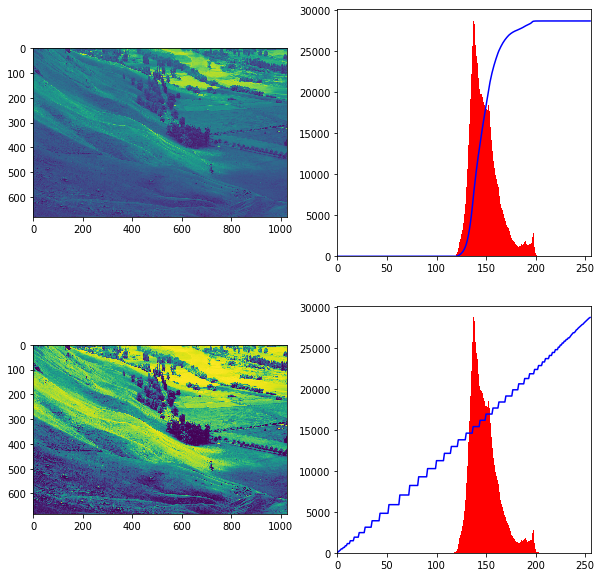

In [9]:
'''
opencv
全局直方图均衡化（对比度增强）equalizeHist
'''
img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/hill.jpg", 0)
equ = cv2.equalizeHist(img)
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(img)
plt.subplot(222) 
plt.plot(CdfNormalize(img), color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.subplot(223), plt.imshow(equ)

plt.subplot(224) 
plt.plot(CdfNormalize(equ), color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

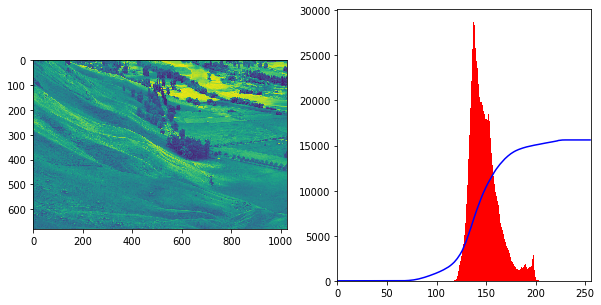

In [10]:
'''
opencv
自适应的局部的直方图均衡化createCLAHE
'''

img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/hill.jpg", 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(img)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cl)

plt.subplot(122) 
plt.plot(CdfNormalize(cl), color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

## 二维直方图

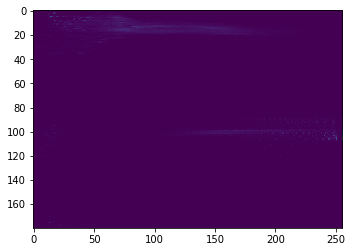

In [11]:
'''OpenCV中的2D直方图'''

img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/joe.jpg")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.imshow(hist,interpolation = 'nearest')

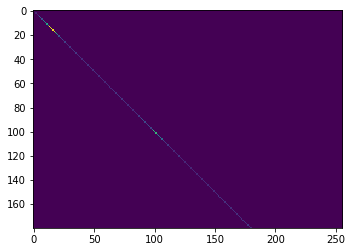

In [12]:
'''numpy'''
img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/joe.jpg")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist, xbins, ybins = np.histogram2d(hsv.ravel(),hsv.ravel(),[180,256],[[0,180],[0,256]])
plt.imshow(hist,interpolation = 'nearest')

## 直方图反投影

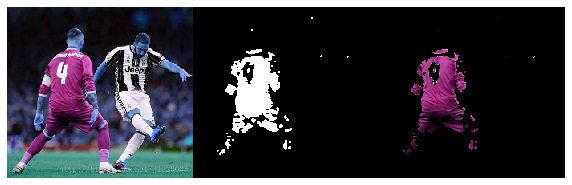

In [13]:

roi = cv2.imread('C:/Users/hichens/Desktop/CV_code/images/pink.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

target = cv2.imread('C:/Users/hichens/Desktop/CV_code/images/player.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

# 计算对象的直方图
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# 直方图均衡化，并应用backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# 使用圆形内核卷积
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# 二值化，按位与
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)

res = np.hstack((target,thresh,res))

plt.figure(figsize=(10, 5))
plt.imshow(res), plt.axis("off")
plt.show()